In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -n "/content/drive/MyDrive/MLMD/archive.zip" -d "/content/drive/MyDrive/MLMD"

Archive:  /content/drive/MyDrive/MLMD/archive.zip


In [ ]:
import os
import shutil
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_dir = "/content/drive/MyDrive/MLMD/train"

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        num_images = len(os.listdir(label_path))
        print(f"Label: {label}, Number of Images: {num_images}")

import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    labels = 'inferred',
    label_mode = 'int'
)

normalization_layer = tf.keras.layers.Rescaling(1./224)

dataset

class_names = dataset.class_names


Label: 0, Number of Images: 2286
Label: 1, Number of Images: 1046
Label: 2, Number of Images: 1516
Label: 3, Number of Images: 757
Label: 4, Number of Images: 173
Found 5778 files belonging to 5 classes.


##### Label Explanation #####
##### Label 0: Healthy knee image.
##### Label 1 (Doubtful): Doubtful joint narrowing with possible osteophytic lipping
##### Label 2 (Minimal): Definite presence of osteophytes and possible joint space narrowing
##### Label 3 (Moderate): Multiple osteophytes, definite joint space narrowing, with mild sclerosis.
##### Label 4 (Severe): Large osteophytes, significant joint narrowing, and severe sclerosis.

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

data_dir = "/content/drive/MyDrive/MLMD/train"
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

corrupt_images = []

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        if not file.lower().endswith(valid_extensions):
            continue

        file_path = os.path.join(subdir, file)
        try:
            with Image.open(file_path) as img:
                img.verify()
        except (UnidentifiedImageError, OSError, ValueError) as e:
            print(f"Corrupt or unreadable image: {file_path}. Error: {e}")
            corrupt_images.append(file_path)

if corrupt_images:
    print(f"\nFound {len(corrupt_images)} corrupt images:")
    for corrupt_file in corrupt_images:
        print(corrupt_file)
else:
    print("\nNo corrupt images found in the dataset.")



No corrupt images found in the dataset.


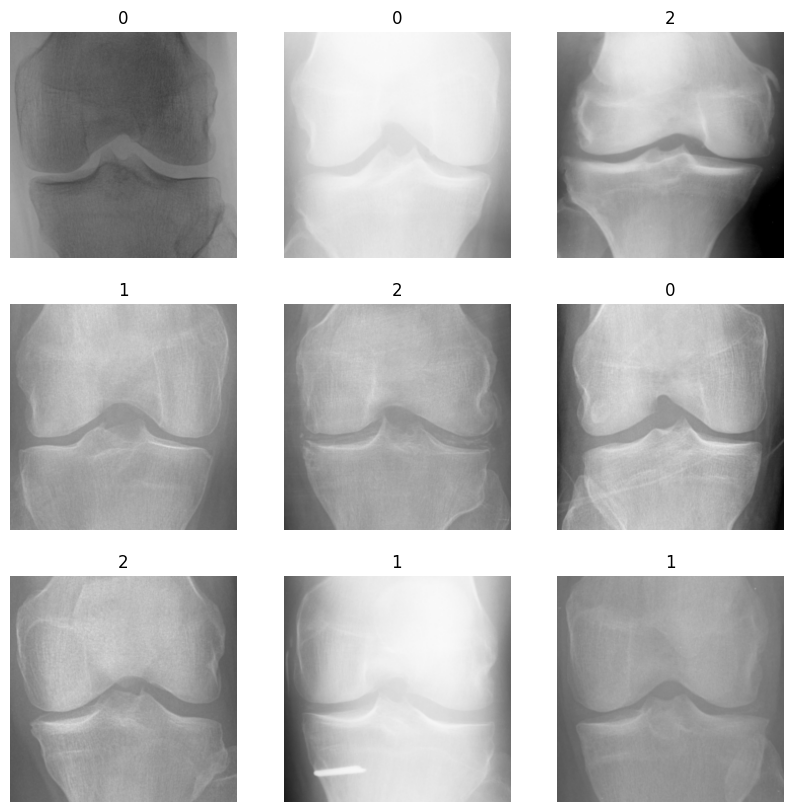

In [ ]:
plt.figure(figsize=(10, 10))
for imgs, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i].numpy().astype('uint8'))
        plt.title(labels[i].numpy())
        plt.axis('off')
plt.show()

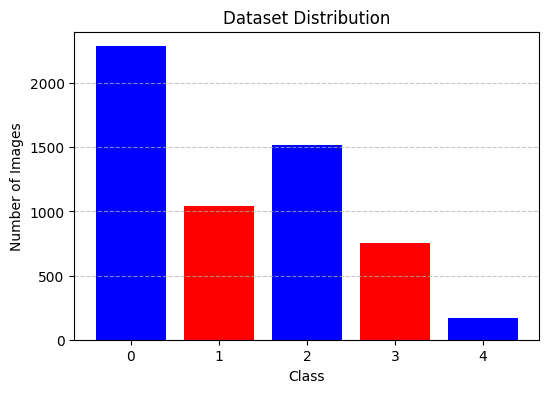

In [ ]:
def plot_dataset_distribution(dataset, class_names):
    class_counts = []
    for label in class_names:
      label_path = os.path.join(data_dir, label)
      label_path = pathlib.Path(label_path)
      image_count = len(list(label_path.glob('*.png')))
      class_counts.append(image_count)

    plt.figure(figsize=(6, 4))
    plt.bar(class_names, class_counts, color=['blue', 'red'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Dataset Distribution")
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

plot_dataset_distribution(dataset, class_names)